In [1]:
%cd ..
!make -C datasets

/home/witiko/documents/Práce/2017/09/segmentation-experiments/SemEvalTask3/segmentation-experiments


# Quality evaluation
The relative frequency of relevant comments at a given position in a thread closely follows Zipf's probability mass function at $n=10, s = 0.18$.

In [2]:
from filenames import SUBTASK_A_TRAIN_DATASET_FNAMES
from preprocessing import retrieve_comment_relevancies

import numpy as np

!LC_ALL=C make -C datasets
absolute_frequencies = [ sum(relevancies[k] for relevancies in retrieve_comment_relevancies(SUBTASK_A_TRAIN_DATASET_FNAMES)) \
                         for k in range(0, 10) ]
relative_frequencies = np.divide(absolute_frequencies, sum(absolute_frequencies))

make: Entering directory '/home/witiko/documents/Práce/2017/09/segmentation-experiments/SemEvalTask3/segmentation-experiments/datasets'
make: Nothing to be done for 'all'.
make: Leaving directory '/home/witiko/documents/Práce/2017/09/segmentation-experiments/SemEvalTask3/segmentation-experiments/datasets'


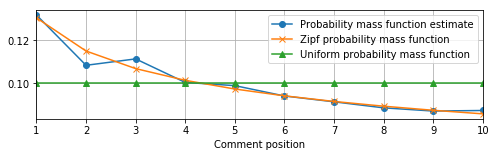

In [3]:
from matplotlib.pyplot import grid, legend, plot, savefig, show, xlim, xticks, ylim, xticks, xlabel, figure

def harmonic_number(n, s):
    """Returns the generalized harmonic number Hn,s."""
    return sum(1 / (i**s) for i in range(1, n+1))

def zipf_pmf(k, n, s):
    return 1 / (harmonic_number(n, s) * (k**s))

figure(figsize=(8, 2))
plot(range(1, 11), relative_frequencies, '-o',
     label='Probability mass function estimate')
plot(range(1, 11), [ zipf_pmf(k, 10, 0.18) for k in range(1, 11) ], '-x',
     label='Zipf probability mass function')
plot(range(1, 11), [ 0.1 for _ in range(1, 11) ], '-^',
     label='Uniform probability mass function')
xlim(1, 10)
xticks(range(1, 11))
xlabel("Comment position")
legend()
grid(True)
savefig("quality_evaluation/quality-evaluation-1.pdf")
show()

There is an inverse relationship (roughly following Zipf's probability mass function with the above parameters) between the position $i$ of a comment in a thread and the magnitude of the machine-learned weight for the similarity between query nuggets and the comment nuggets at position $i$.

In [6]:
from evaluation import train_segmented_ml
from filenames import SUBTASK_B_TRAIN2017_DATASET_FNAMES
from language_model import LanguageModel

training_dataset_fnames = SUBTASK_B_TRAIN2017_DATASET_FNAMES
language_model = LanguageModel()
classifier = train_segmented_ml(language_model, training_dataset_fnames)

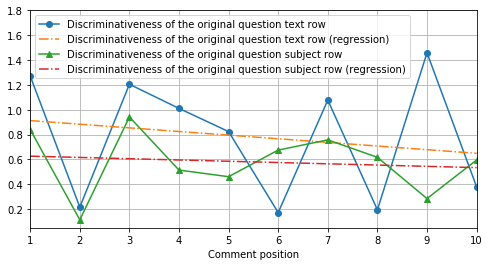

In [7]:
from matplotlib.pyplot import figure

figure(figsize=(8, 4))
plot(range(1, 11), np.abs(classifier.coef_[0][2:12]), '-o',
     label="Discriminativeness of the original question text row")
a, b = np.polyfit(range(1, 11), np.abs(classifier.coef_[0][2:12]), deg=1)
plot(range(1, 11), [ a*x + b for x in range(1, 11) ], '-.',
     label='Discriminativeness of the original question text row (regression)')

plot(range(1, 11), np.abs(classifier.coef_[0][14:24]), '-^',
     label="Discriminativeness of the original question subject row")
a, b = np.polyfit(range(1, 11), np.abs(classifier.coef_[0][14:24]), deg=1)
plot(range(1, 11), [ a*x + b for x in range(1, 11) ], '-.',
     label="Discriminativeness of the original question subject row (regression)")

xlim(1, 10)
ylim(0.05, 1.8)
xticks(range(1, 11))
xlabel("Comment position")
legend()
grid(True)
savefig("quality_evaluation/quality-evaluation-3.pdf")
show()

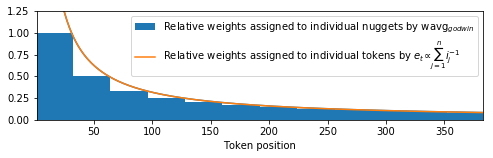

In [9]:
from matplotlib.pyplot import bar
from math import floor

avg_document_length = 383
X = np.linspace(1, avg_document_length, avg_document_length)
Y_wavggodwin = [1/((floor(x/(avg_document_length/12))+1)) for x in X]
Y_termgodwin = [1/((i+1)/(avg_document_length/12)) for i in X]

figure(figsize=(8, 2))
f1 = bar(X, Y_wavggodwin, align='edge', width=X[1]-X[0], label="Relative weights assigned to individual nuggets by wavg$_{godwin}$")
plot(X, Y_termgodwin)
f2, = plot(X, Y_termgodwin, label="Relative weights assigned to individual tokens by $e_t∝\sum_{j=1}^n i_j^{-1}$")
legend(handles=[f1, f2])
xlim(1, avg_document_length)
ylim(0, 1.25)
xlabel("Token position")
savefig("quality_evaluation/quality-evaluation-4.pdf")
show()